In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Differentiation

We start with the basic definition of 1-D differientation:

$$
\frac{df(x)}{dx} \equiv {\rm lim}_{h\to 0} \frac{f(x+h)-f(x)}{h}
$$

Where we have the function $f(x)$ computed over a series of points $x_i$. In this case, there are two ways to compute the derivative.

## Forward Difference

This uses as a base the Taylor expansion of the function around $f(x+h)$

$$
f(x+h) = f(x) + h\frac{df}{dx} + \frac{h^2}{2!}\frac{d^2f}{dx^2}+\cdots
$$
from which we can write

$$
\frac{df}{dx} \approx \frac{f(x+h) - f(x)}{h}
$$

In [2]:
def my_func(x):
    return exp(-(x**2))
def my_func_prime(x):
    return -2*x * exp(-(x**2))

0.00100010001


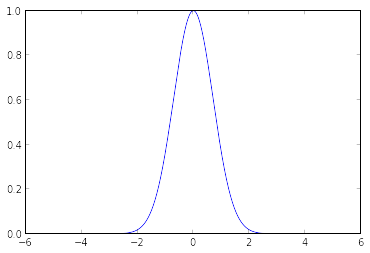

In [3]:
n_points = 10000
x = linspace(-5.0,5.0,n_points)
h = x[1]-x[0]
print h
f = my_func(x)
plot(x,f)

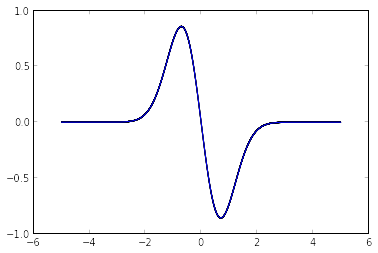

In [4]:
f_prime_diff = (f[1:] - f[0:-1])/h
f_prime_true = my_func_prime(x[0:-1])
scatter(x[0:-1], f_prime_diff,s=0.1)
plot(x[0:-1], f_prime_true)

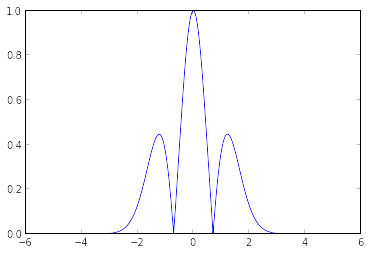

In [5]:
plot(x[0:-1], abs(f_prime_true-f_prime_diff)/h)

## Central Difference

An improved algorithm for the difference use a central difference

$$
\frac{df}{dx}\approx \frac{f(x+h) - f(x-h))}{2h}
$$

0.00100010001


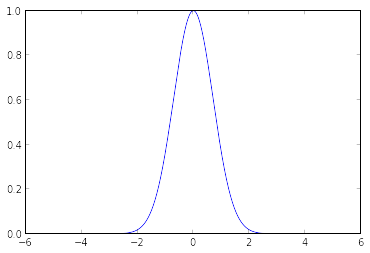

In [6]:
n_points = 10000
x = linspace(-5.0,5.0,n_points)
h = x[1]-x[0]
print h
f = my_func(x)
plot(x,f)

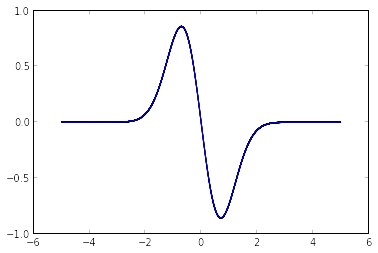

In [7]:
f_prime_diff = (f[2:-1] - f[0:-3])/(2*h)
f_prime_true = my_func_prime(x[1:-2])
scatter(x[1:-2], f_prime_diff,s=0.1)
plot(x[1:-2], f_prime_true)

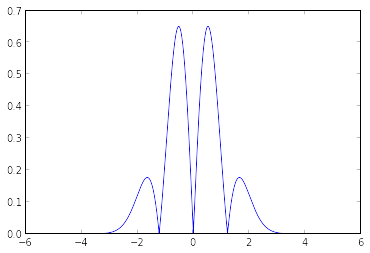

In [8]:
plot(x[1:-2], abs(f_prime_true-f_prime_diff)/(h*h))

## Second derivative

We can use the same algorithm to estimate the second derivative

$$
\frac{d^2f}{dx^2} \approx \frac{f^{\prime}(x+h/2) - f^{\prime}(x-h/2)}{h}\approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
$$

In [9]:
def my_func(x):
    return sin(x)
def my_func_prime_prime(x):
    return -sin(x)

0.00157095342214


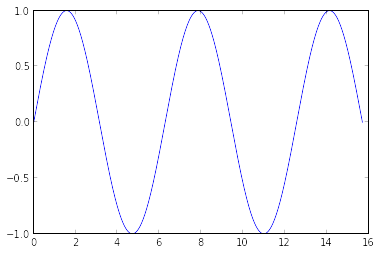

In [10]:
n_points = 10000
x = linspace(0,5.0*pi,n_points)
h = x[1]-x[0]
print h
f = my_func(x)
plot(x,f)

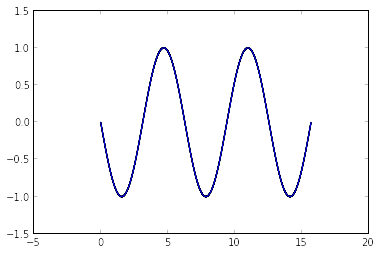

In [11]:
f_prime_prime_diff = (f[2:-1] -2*f[1:-2] + f[0:-3])/(h**2)
f_prime_prime_true = my_func_prime_prime(x[1:-2])
scatter(x[1:-2], f_prime_prime_diff,s=0.1)
plot(x[1:-2], f_prime_prime_true)

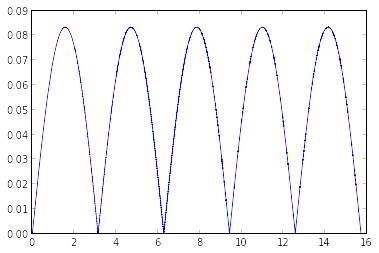

In [12]:
plot(x[1:-2], abs(f_prime_prime_true-f_prime_prime_diff)/(h*h))

# Trial-and-error Searching

Many computational problems are reduced to finding the roots of a function, i.e., the $x$ for which $f(x) = 0$. We will discuss now the Newton-Raphson method. 

The method has an initial guesss $x_0$ and uses the derivative at this point, $f^{\prime}(x_0)$, to find a new value $x_0+\Delta x$ closer to the root of the function.

This step $\Delta x$ is defined as:

$$
\Delta x = - \frac{f(x_0)}{f^{\prime}(x_0)}
$$


In [15]:
def my_func(x):
    return x**2 - 3*x - 10

In [16]:
def my_prime_func(x,h):
    return (my_func(x+h) - my_func(x-h))/(2.0*h)

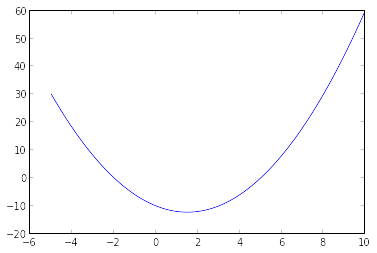

In [17]:
x = linspace(-5.0,10.0,100)
plot(x, my_func(x))

In [18]:
x_guess = -5.0
h = 0.01
while (abs(my_func(x_guess)) > 1E-3):
    delta_x = -my_func(x_guess)/my_prime_func(x_guess,h)
    x_guess = x_guess + delta_x
    print x_guess

-2.69230769231
-2.05716302047
-2.00045930013
-2.00000003013


In [19]:
x_guess = 8.0
h = 0.01
while (abs(my_func(x_guess)) > 1E-3):
    delta_x = -my_func(x_guess)/my_prime_func(x_guess,h)
    x_guess = x_guess + delta_x
    print x_guess

5.69230769231
5.05716302047
5.00045930013
5.00000003013


### Exercise

In Quantum Mechanics the energy of the bound states for a particle in a potential well of depth $V_0=-10$ (In units where $\hbar=1$, $m=1$ and the well has width $2a=1$) are described by the following relation

$$
\sqrt{|V_0|-E} \tan(\sqrt{|V_0|-E})\equiv \sqrt{10−E} \tan(\sqrt{10−E}) = \sqrt{E}
$$

Write a program (in Python) to find the values for $E$ that satisfy this equation, i.e. the energy $E>0$ of the bound states that can exist in this potential well. How many of these states can you find for $V_0=10,50,100$?